In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, func, inspect, desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# R&R dates 11/1/18-11/15/18 - 15 days

In [11]:
inspector = inspect(engine) 
inspector.get_table_names()

['measurement', 'station']

In [12]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
 # Query All Records in the the Database
data_station = engine.execute("SELECT * FROM station")

for record_stat in data_station:
    print(record_stat)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [14]:
 # Query All Records in the the Database
data_measurement = engine.execute("SELECT * FROM measurement LIMIT 25")

for record_measure in data_measurement:
    print(record_measure)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)
(11, 'USC00519397', '2010-01-12', 0.0, 61.0)
(12, 'USC00519397', '2010-01-14', 0.0, 66.0)
(13, 'USC00519397', '2010-01-15', 0.0, 65.0)
(14, 'USC00519397', '2010-01-16', 0.0, 68.0)
(15, 'USC00519397', '2010-01-17', 0.0, 64.0)
(16, 'USC00519397', '2010-01-18', 0.0, 72.0)
(17, 'USC00519397', '2010-01-19', 0.0, 66.0)
(18, 'USC00519397', '2010-01-20', 0.0, 66.0)
(19, 'USC00519397', '2010-01-21', 0.0, 69.0)
(20, 'USC00519397', '2010-01-22', 0.0, 67.0)
(21, 'USC00519397', '2010-01-23', 0.0, 67.0)
(22, 'USC00519397', '2010-01-24', 0.01, 71.0)
(23, 'USC00519

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
    # 2017-08-23 to 2016-08-24 range
# Perform a query to retrieve the data and precipitation scores

range_12mos = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").\
    group_by(Measurement.date).all()
range_12mos[0:10]

[('2016-08-24', 1.45),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.01),
 ('2016-08-27', None),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.01),
 ('2016-09-02', 0.03)]

In [ ]:
len(range_12mos)

In [31]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

weather_df = pd.DataFrame(range_12mos)
weather_df.head()
weather_df.set_index('date').head()

,prcp
date,
2016-08-24,1.45
2016-08-25,0.11
2016-08-26,0.01
2016-08-27,NaN
2016-08-28,2.07


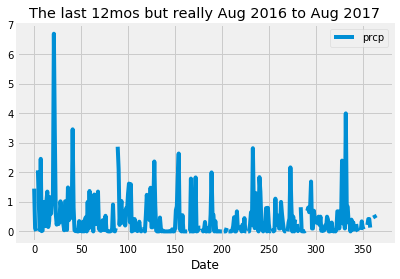

In [44]:
# Use Pandas Plotting with Matplotlib to plot the data
weather_df.plot()
plt.title("The last 12mos but really Aug 2016 to Aug 2017")
plt.xlabel('Date')
plt.legend
plt.savefig("last12mos")
plt.show()

In [46]:
# Use Pandas to calcualte the summary statistics for the precipitation data
weather_df.describe()

,prcp
count,344.000000
mean,0.431308
std,0.705240
min,0.000000
25%,0.010000
50%,0.140000
75%,0.565000
max,6.700000


In [51]:
# Design a query to show how many stations are available in this dataset?
stations_num = session.query(Measurement).group_by(Measurement.station).count()
stations_num
print(f'{stations_num} stations are listed in Hawaii, well in this dataset')

9 stations are listed in Hawaii, well in this dataset


In [99]:
# What are the most active stations? (i.e. what stations have the most rows)? List the stations and the counts in descending order.
# Using the station id from the previous query, calculate the lowest temperature recorded,highest temperature recorded, and average temperature most active station?
# func.min
# func.max
# func.avg
most_active = session.query(Measurement.station,         
         func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [119]:
station_id = [moderate[0] for moderate in most_active[:9]]
station_id

['USC00519281',
 'USC00519397',
 'USC00513117',
 'USC00519523',
 'USC00516128',
 'USC00514830',
 'USC00511918',
 'USC00517948',
 'USC00518838']

In [110]:
most_active[0]
print(f'{most_active[0][0]} is the most active station')

USC00519281 is the most active station


In [160]:
session.query(Station).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2d1f1461f28>,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716}

In [161]:
session.query(Measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2d1f1ac2b38>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397'}

In [162]:
station_1 = session.query(Measurement.tobs).\
                    filter(Measurement.station == most_active[0][0]).\
                    filter(Measurement.date.between('2016-08-23','2017-08-24')).\
                    order_by(Measurement.tobs.desc()).all()
station_1[:10]

[(83.0),
 (82.0),
 (82.0),
 (82.0),
 (81.0),
 (81.0),
 (81.0),
 (81.0),
 (80.0),
 (80.0)]

In [164]:
most_most = [float(i[0]) for i in station_1]
most_most[:10]

[83.0, 82.0, 82.0, 82.0, 81.0, 81.0, 81.0, 81.0, 80.0, 80.0]

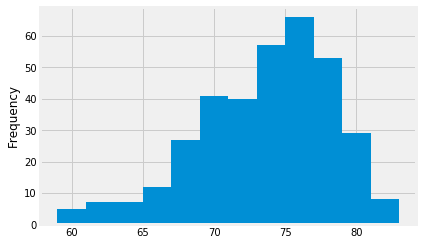

In [175]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(most_most, bins=12, label='tobs')
plt.legend
plt.ylabel('Frequency')
plt.savefig('hist')
plt.show()

In [176]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [152]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [153]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [154]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


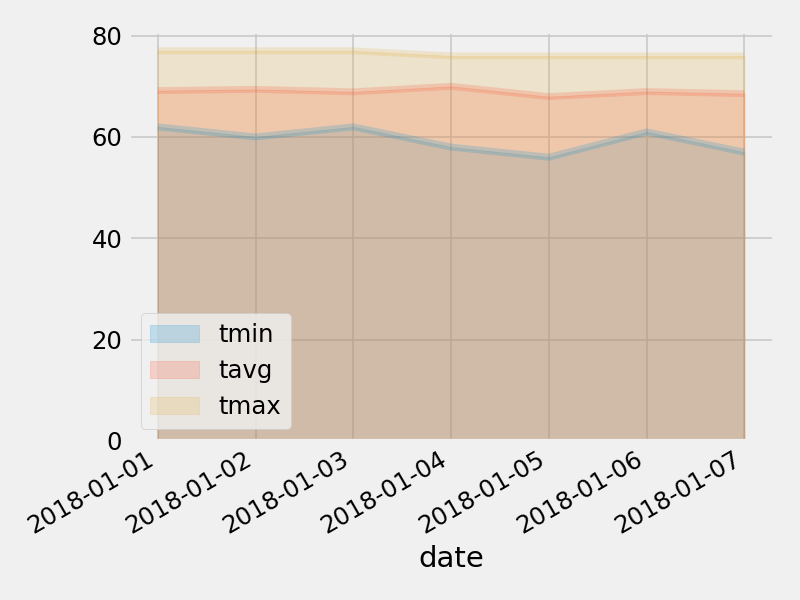

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
